In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Hodrick-Prescott Filter
This filter separates a time series data into a 'trend' component and a 'seasonality' component.

In [2]:
# read data
df = pd.read_csv('Data/macrodata.csv', index_col = 0, parse_dates = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<Axes: >

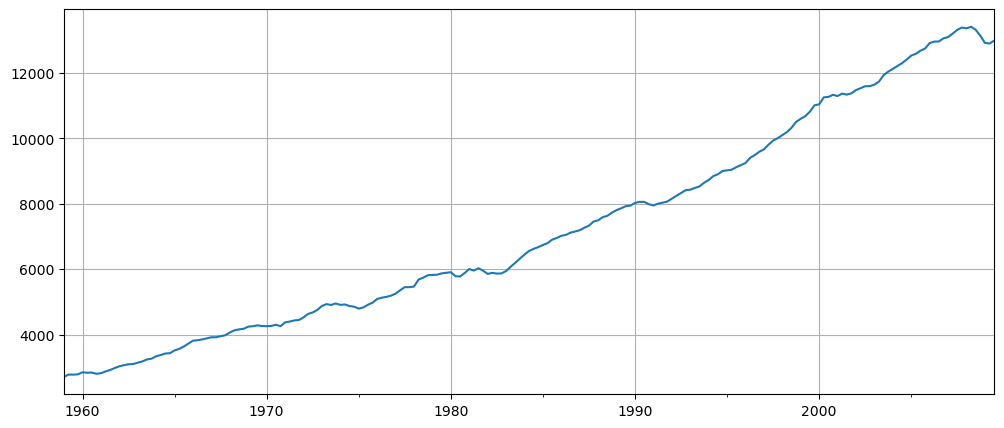

In [4]:
df['realgdp'].plot(figsize = (12, 5), grid = True)

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [8]:
# decompose into cycle and trend
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb = 1600)

In [9]:
type(gdp_cycle)

pandas.core.series.Series

In [12]:
df['gdp_trend'] = gdp_trend
df['gdp_cycle'] = gdp_cycle

<Axes: >

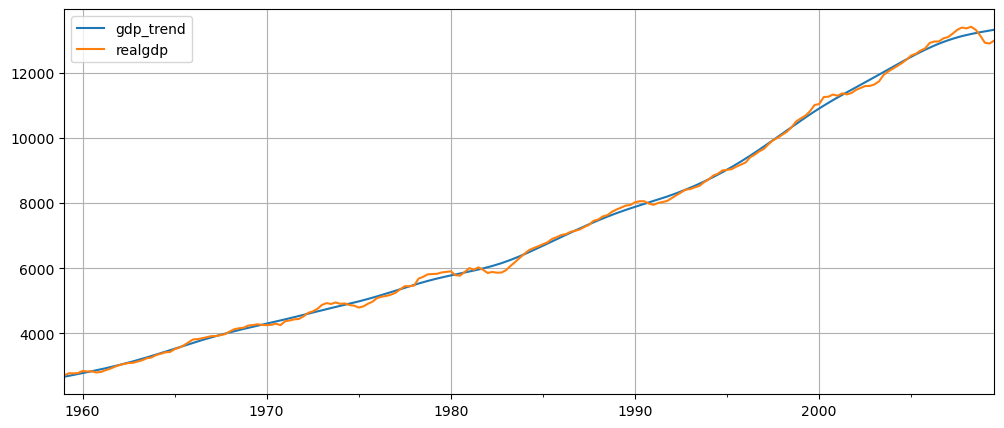

In [15]:
df[['gdp_trend', 'realgdp']].plot(figsize = (12, 5), grid = True)

<Axes: title={'center': '2008 Recession GDP'}>

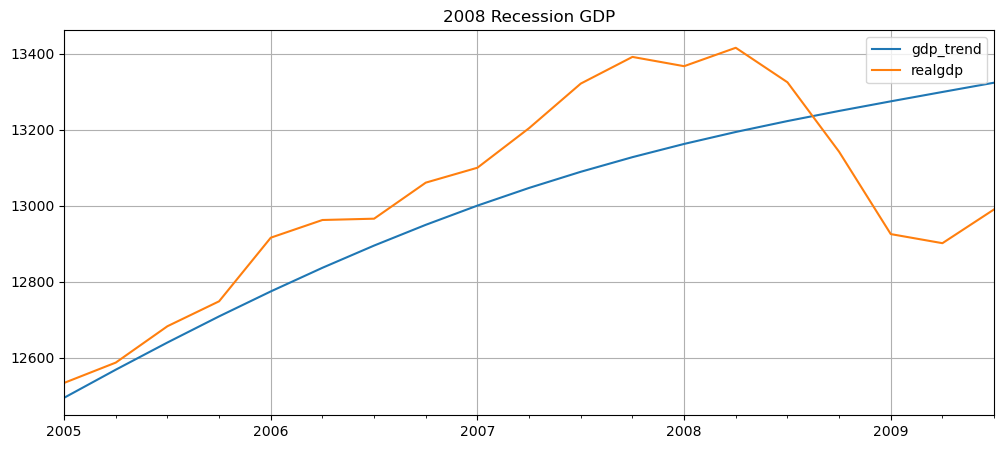

In [18]:
df[['gdp_trend', 'realgdp']]['2005-01-01':].plot(figsize = (12, 5), grid = True, title = '2008 Recession GDP')

### ETS(Error-Trend-Seasonality) Decomposition
Additive models for linear data <br>
Multiplicative models for non-linear data

In [20]:
df = pd.read_csv('Data/airline_passengers.csv', index_col = 'Month', parse_dates = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [21]:
# drop missing data
df.dropna(inplace = True)

In [22]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

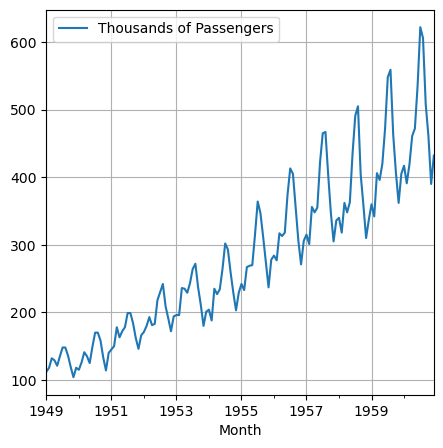

In [24]:
df.plot(figsize = (5, 5), grid = True)

In [26]:
# the data seems to be non-linear hence, multiplicative model
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
result = seasonal_decompose(df['Thousands of Passengers'], model = 'multiplicative')

In [29]:
result

In [30]:
result.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [31]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

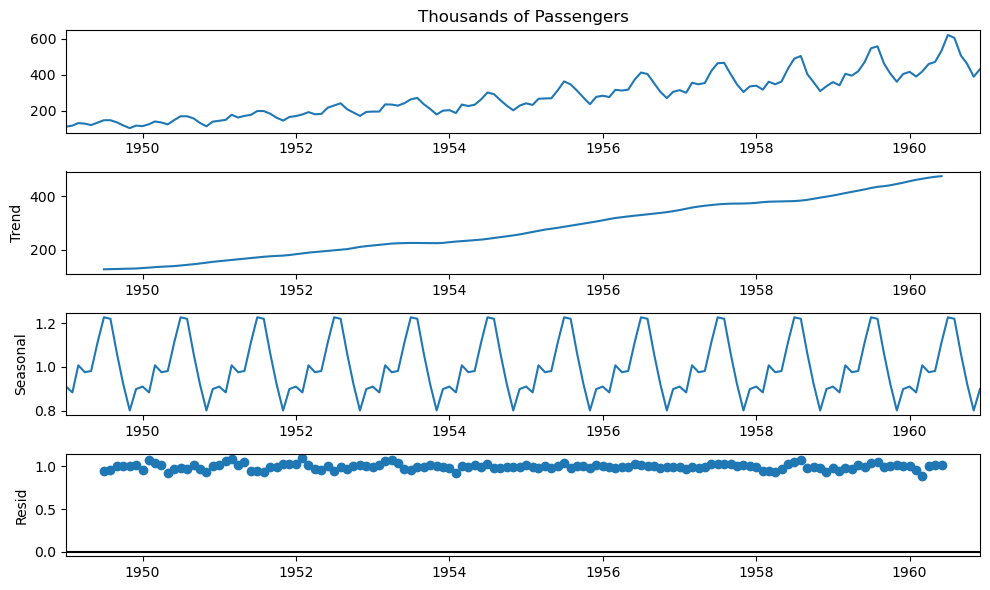

In [39]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
result.plot();